In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

prices = pd.read_excel('data/prices.xlsx', index_col=0)
precipitations_mm = pd.read_excel('data/weather_merignac.xlsx', sheet_name='precipitations_mm')
temp_minimals = pd.read_excel('data/weather_merignac.xlsx', sheet_name='temp_minimals')
temp_maximals = pd.read_excel('data/weather_merignac.xlsx', sheet_name='temp_maximals')
frost_days = pd.read_excel('data/weather_merignac.xlsx', sheet_name='frost_days_count')

# Exploring data

## Exploring price data

,Château Lafite Rothschild Pauillac,Château Latour Pauillac,Château Mouton Rothschild Pauillac,Château Margaux,Château Haut-Brion Pessac-léognan
1950,671.0,445.0,982.0,316.0,510.0
1951,1133.0,442.0,1013.0,316.0,883.0
1952,284.0,328.0,439.0,328.0,368.0
1953,2666.0,442.0,817.0,997.0,837.0
1954,574.0,860.0,1842.0,645.0,685.0


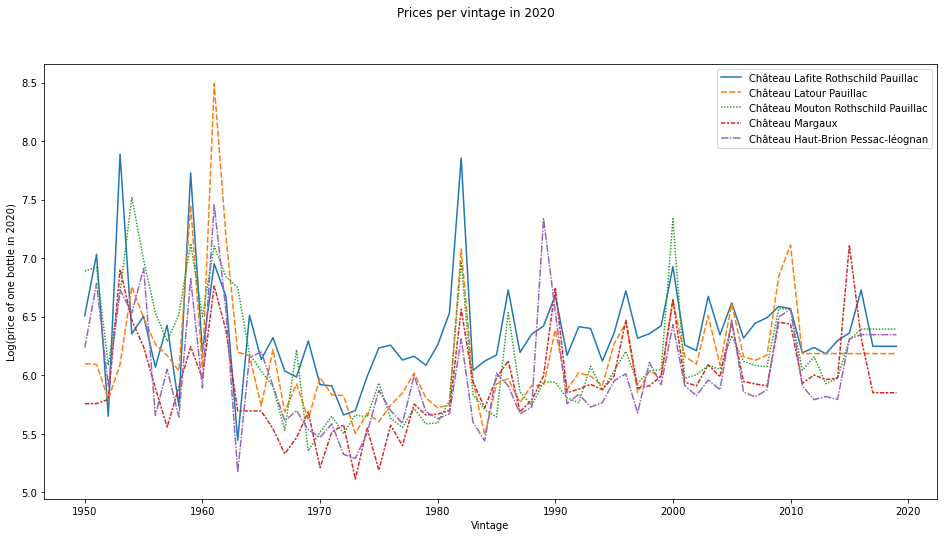

In [13]:
premiers_1855 = prices[prices['Category']=='Premier cru 1855'].drop('Category', axis=1).transpose().fillna(method='ffill')
display(premiers_1855.iloc[:5,:5])
log_premiers_1855 = np.log(premiers_1855)
log_premiers_1855.index = log_premiers_1855.index.astype(int)

plt.figure(figsize=(16,8))
plot = sns.lineplot(data=log_premiers_1855)
plt.ylabel('Log(price of one bottle in 2020)')
plt.xlabel('Vintage')
plt.suptitle('Prices per vintage in 2020')
plt.savefig('data/prices_per_vintage.png')
#plot.set(ylim=(0,2000))

Now we want to confirm that the annual return of a grand cru is about 4%.

For the 1950-1970 period

[-3.79085088e-02  8.05406153e+01]
[[-0.03790851]] [80.54061533]


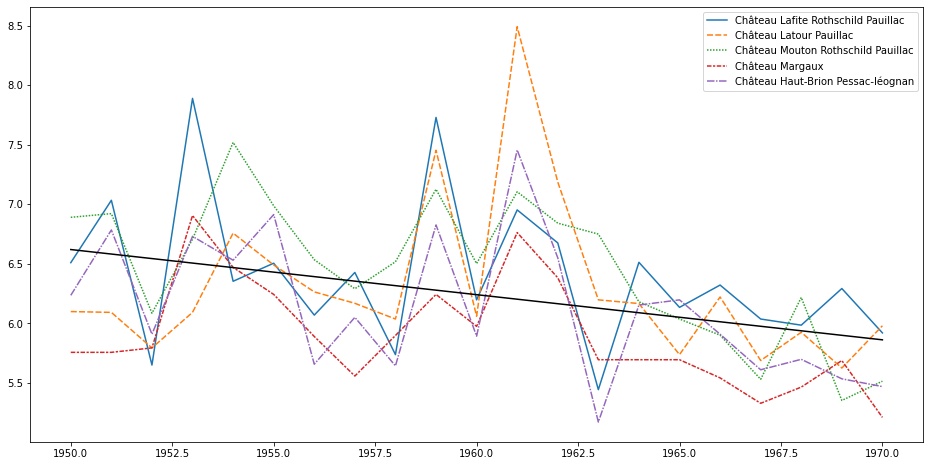

In [3]:
from sklearn.linear_model import LinearRegression

log_premiers_1855_extract = log_premiers_1855.loc[:1970, :]
average_price = log_premiers_1855_extract.mean(axis=1)
vintage = log_premiers_1855_extract.reset_index()['index']

poly = np.polyfit(vintage, average_price, 1)
print(poly)
lr = LinearRegression()
lr.fit(vintage.values.reshape(-1, 1), average_price.values.reshape(-1, 1))
print(lr.coef_, lr.intercept_)

f = np.poly1d(poly)


plt.figure(figsize=(16,8))
plot = sns.lineplot(data=log_premiers_1855_extract)
plt.plot(vintage,f(vintage), color='black')
#plot.set(ylim=(0,2000))
plt.show()

[4.55450899e-05 6.03082213e+00]
[[4.55450899e-05]] [6.03082213]


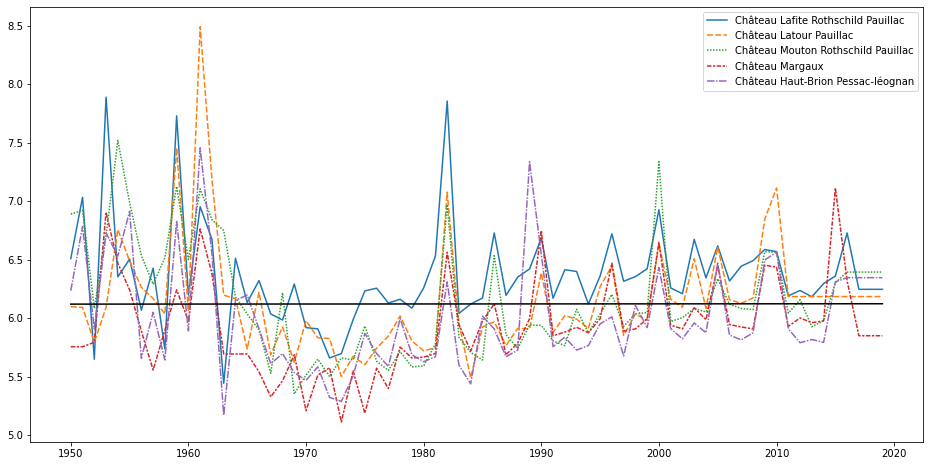

In [4]:
average_price = log_premiers_1855.mean(axis=1)
vintage = log_premiers_1855.reset_index()['index']

poly = np.polyfit(vintage, average_price, 1)
print(poly)
lr = LinearRegression()
lr.fit(vintage.values.reshape(-1, 1), average_price.values.reshape(-1, 1))
print(lr.coef_, lr.intercept_)

f = np.poly1d(poly)


plt.figure(figsize=(16,8))
plot = sns.lineplot(data=log_premiers_1855)
plt.plot(vintage,f(vintage), color='black')
#plot.set(ylim=(0,2000))
plt.show()

,Château Lafite Rothschild Pauillac,Château Latour Pauillac,Château Mouton Rothschild Pauillac,Château Margaux,Château Haut-Brion Pessac-léognan
1950,671.0,445.0,982.0,316.0,510.0
1951,1133.0,442.0,1013.0,316.0,883.0
1952,284.0,328.0,439.0,328.0,368.0
1953,2666.0,442.0,817.0,997.0,837.0
1954,574.0,860.0,1842.0,645.0,685.0


[-6.06224205e-03  1.69606273e+01]


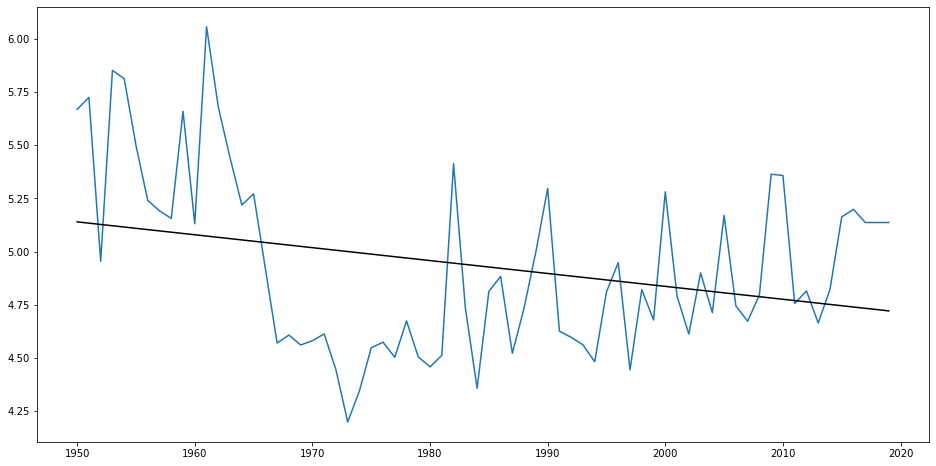

In [6]:
prices_table = prices.drop('Category', axis=1).transpose().fillna(method='ffill')
display(prices_table.iloc[:5,:5])
prices_table = np.log(prices_table)
prices_table.index = prices_table.index.astype(int)

vintage = prices_table.index
average=prices_table.mean(axis=1)
poly = np.polyfit(prices_table.index, average, 1)
print(poly)
f = np.poly1d(poly)

plt.figure(figsize=(16,8))
sns.lineplot(x=prices_table.index, y=average)
sns.lineplot(x=vintage, y=f(vintage), color='black')
#plot.set(ylim=(0,2000))
plt.show()

### Cutting down into smaller parts

[-4.86627621e-02  1.00654645e+02]


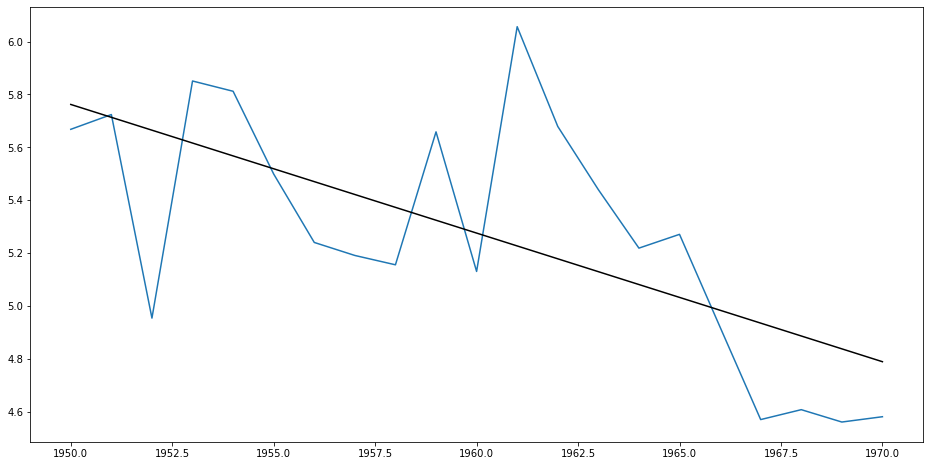

In [7]:
vintage = prices_table.loc[:1970,:].index
average=prices_table.loc[:1970,:].mean(axis=1)
poly = np.polyfit(vintage, average, 1)
print(poly)
f = np.poly1d(poly)


plt.figure(figsize=(16,8))
sns.lineplot(x=vintage, y=average)
sns.lineplot(x=vintage, y=f(vintage), color='black')
#plot.set(ylim=(0,2000))
plt.show()

[ 1.18237841e-02 -1.88045345e+01]


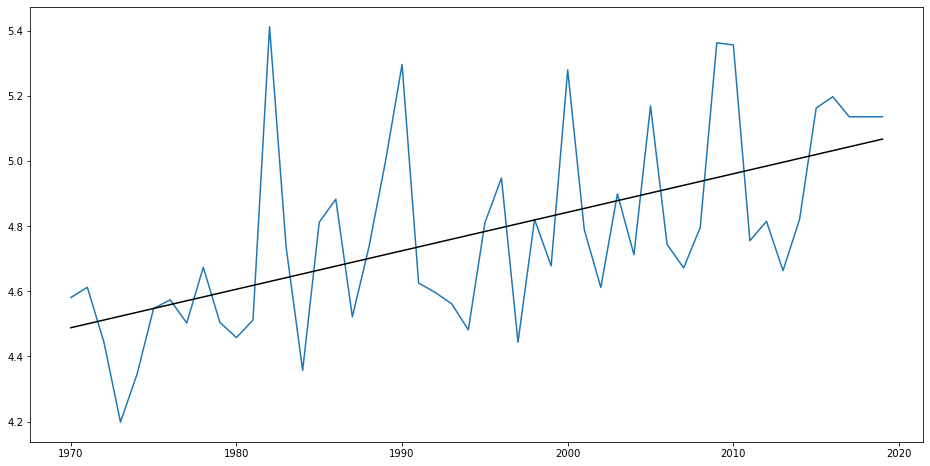

In [8]:
vintage = prices_table.loc[1970:,:].index
average=prices_table.loc[1970:,:].mean(axis=1)
poly = np.polyfit(vintage, average, 1)
print(poly)
f = np.poly1d(poly)


plt.figure(figsize=(16,8))
sns.lineplot(x=vintage, y=average)
sns.lineplot(x=vintage, y=f(vintage), color='black')
#plot.set(ylim=(0,2000))
plt.show()